In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
xls = pd.ExcelFile('saudischools1442h.xlsx')

In [3]:
df1 = pd.read_excel(xls, 'Sheet1')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   المنطقة الإدارية   5597 non-null   object
 1   إدارة التعليم      5597 non-null   object
 2   مكتب التعليم       5597 non-null   object
 3   السلطة             5597 non-null   object
 4   المرحلة            5597 non-null   object
 5   نوع المدرسة        5597 non-null   object
 6   جنس المدرسة        5597 non-null   object
 7   جملة طلاب          5597 non-null   int64 
 8   جملة طلاب سعودي    5597 non-null   int64 
 9   جملة معلمين        5597 non-null   int64 
 10  جملة معلمين سعودي  5597 non-null   int64 
 11  جملة إداريون       5597 non-null   int64 
 12   جملة إداري سعودي  5597 non-null   int64 
 13  خدم                5597 non-null   int64 
 14   عمال              5597 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 656.0+ KB


In [5]:
df1['المنطقة الإدارية'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
5592    False
5593    False
5594    False
5595    False
5596    False
Name: المنطقة الإدارية, Length: 5597, dtype: bool

In [6]:
df1 = df1.groupby('المنطقة الإدارية').sum()

In [7]:
df1

,جملة طلاب,جملة طلاب سعودي,جملة معلمين,جملة معلمين سعودي,جملة إداريون,جملة إداري سعودي,خدم,عمال
المنطقة الإدارية,,,,,,,,
الباحة,84464,80441,11092,11061,2016,2015,143,182
الجوف,151527,142957,12503,11804,3059,3045,105,149
الحدود الشمالية,88482,82058,7156,6877,906,904,54,143
الرياض,1473236,1189861,114635,101830,30076,29660,640,1525
الشرقية,909884,792498,62982,57333,12432,12202,253,1268
القصيم,292996,272724,29971,29424,6357,6346,227,657
المدينة المنورة,443254,388135,37617,36183,6696,6657,235,1032
تبوك,205673,195246,16048,15054,3849,3837,253,209
جازان,354608,311930,26487,26143,6160,6148,105,767


In [8]:
df1.drop(df1.columns[[1,2, 3, 4,5,6,7]], axis = 1, inplace = True)

In [9]:
df1.columns

Index(['جملة طلاب'], dtype='object')

In [10]:
df1['جملة طلاب']= df1['جملة طلاب'].astype('float')

In [11]:
df1.dtypes

جملة طلاب    float64
dtype: object

In [12]:
df1

,جملة طلاب
المنطقة الإدارية,
الباحة,84464.0
الجوف,151527.0
الحدود الشمالية,88482.0
الرياض,1473236.0
الشرقية,909884.0
القصيم,292996.0
المدينة المنورة,443254.0
تبوك,205673.0
جازان,354608.0


In [13]:
student_mean= df1['جملة طلاب'].mean()
student_mean

477951.23076923075

In [14]:
student_median=np.median(df1['جملة طلاب'])
student_median



292996.0

In [15]:
student_mode=stats.mode(df1['جملة طلاب'])
student_mode

ModeResult(mode=array([84464.]), count=array([1]))

عدد المدارس في المملكة لكل منطقة:

In [16]:
df3 = pd.read_excel(xls, 'Sheet3')

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433 entries, 0 to 2432
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   المنطقة الإدارية     2433 non-null   object
 1   إدارة التعليم        2433 non-null   object
 2   مكتب التعليم         2433 non-null   object
 3   السلطة               2433 non-null   object
 4   المرحلة              2433 non-null   object
 5   جنس المدرسة          2433 non-null   object
 6   عدد المدارس (مراحل)  2433 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 133.2+ KB


In [18]:
df3 = pd.read_excel(xls, 'Sheet3')
df3 =df3.groupby('المنطقة الإدارية').sum()



In [19]:
df3['عدد المدارس (مراحل)']= df3['عدد المدارس (مراحل)'].astype('float')

In [20]:
df3

,عدد المدارس (مراحل)
المنطقة الإدارية,
الباحة,941.0
الجوف,798.0
الحدود الشمالية,505.0
الرياض,7246.0
الشرقية,3516.0
القصيم,2093.0
المدينة المنورة,2313.0
تبوك,1053.0
جازان,2103.0


In [21]:
df4 = pd.read_excel(xls, 'Sheet4')
df4 =df4.groupby('المنطقة الإدارية').sum()

In [22]:
df4[' فصول جملة']= df4[' فصول جملة'].astype('float')

In [23]:
df4

,فصول جملة
المنطقة الإدارية,
الباحة,5662.0
الجوف,6968.0
الحدود الشمالية,3978.0
الرياض,66100.0
الشرقية,38062.0
القصيم,15561.0
المدينة المنورة,20291.0
تبوك,9080.0
جازان,15966.0


In [24]:
mareg_df = pd.merge(df1,df3, on='المنطقة الإدارية')
mareg_df

,جملة طلاب,عدد المدارس (مراحل)
المنطقة الإدارية,,
الباحة,84464.0,941.0
الجوف,151527.0,798.0
الحدود الشمالية,88482.0,505.0
الرياض,1473236.0,7246.0
الشرقية,909884.0,3516.0
القصيم,292996.0,2093.0
المدينة المنورة,443254.0,2313.0
تبوك,205673.0,1053.0
جازان,354608.0,2103.0


In [25]:
mareg_df = pd.merge(mareg_df,df4, on='المنطقة الإدارية')
mareg_df

,جملة طلاب,عدد المدارس (مراحل),فصول جملة
المنطقة الإدارية,,,
الباحة,84464.0,941.0,5662.0
الجوف,151527.0,798.0,6968.0
الحدود الشمالية,88482.0,505.0,3978.0
الرياض,1473236.0,7246.0,66100.0
الشرقية,909884.0,3516.0,38062.0
القصيم,292996.0,2093.0,15561.0
المدينة المنورة,443254.0,2313.0,20291.0
تبوك,205673.0,1053.0,9080.0
جازان,354608.0,2103.0,15966.0


In [26]:
xls1 = pd.ExcelFile('القوى العاملة.xlsx')

In [27]:
df5 = pd.read_excel(xls1, 'Sheet1')

In [28]:
df5

,المنطقة,ادارة التعليم,بنين,بنات,جملة
0,الرياض,الإدارة العامة للتعليم بمنطقة الرياض,34943,45685,80628
1,NaN,إدارة التعليم بمحافظة الافلاج,746,830,1576
2,NaN,إدارة التعليم بمحافظتي حوطة بني تميم والحريق,757,962,1719
3,NaN,إدارة التعليم بمحافظة الخرج,2711,3975,6686
4,NaN,إدارة التعليم بمحافظة الدوادمي,2618,4026,6644
5,NaN,إدارة التعليم بمحافظة الزلفي,881,985,1866
6,NaN,إدارة التعليم بمحافظة شقراء,614,864,1478
7,NaN,إدارة التعليم بمحافظة عفيف,1023,1440,2463
8,NaN,إدارة التعليم بمحافظة الـغاط,130,184,314
9,NaN,إدارة التعليم بمحافظة القويعية,1720,2466,4186


In [29]:
df5 = df5.fillna(method='ffill')
df5

,المنطقة,ادارة التعليم,بنين,بنات,جملة
0,الرياض,الإدارة العامة للتعليم بمنطقة الرياض,34943,45685,80628
1,الرياض,إدارة التعليم بمحافظة الافلاج,746,830,1576
2,الرياض,إدارة التعليم بمحافظتي حوطة بني تميم والحريق,757,962,1719
3,الرياض,إدارة التعليم بمحافظة الخرج,2711,3975,6686
4,الرياض,إدارة التعليم بمحافظة الدوادمي,2618,4026,6644
5,الرياض,إدارة التعليم بمحافظة الزلفي,881,985,1866
6,الرياض,إدارة التعليم بمحافظة شقراء,614,864,1478
7,الرياض,إدارة التعليم بمحافظة عفيف,1023,1440,2463
8,الرياض,إدارة التعليم بمحافظة الـغاط,130,184,314
9,الرياض,إدارة التعليم بمحافظة القويعية,1720,2466,4186


In [30]:
df5=df5.groupby(['المنطقة'], as_index=False).sum()

In [31]:
df5

,المنطقة,بنين,بنات,جملة
0,الباحة,4984,6108,11092
1,الجوف,5939,6564,12503
2,الحدود الشمالية,3671,3485,7156
3,الرياض,49364,65271,114635
4,الشرقية,29707,33275,62982
5,القصيم,13205,16766,29971
6,المدينة المنورة,17092,20525,37617
7,تبوك,7441,8607,16048
8,جازان,12169,14318,26487
9,حائل,8416,8873,17289


In [32]:
df5.drop('بنات', axis=1, inplace=True)

In [33]:
df5.drop('بنين', axis=1, inplace=True)

In [34]:
df5

,المنطقة,جملة
0,الباحة,11092
1,الجوف,12503
2,الحدود الشمالية,7156
3,الرياض,114635
4,الشرقية,62982
5,القصيم,29971
6,المدينة المنورة,37617
7,تبوك,16048
8,جازان,26487
9,حائل,17289


In [35]:
df5.rename(columns={'المنطقة':'المنطقة الإدارية',
    'جملة':'عدد المعلمين'}, inplace=True)
df5

,المنطقة الإدارية,عدد المعلمين
0,الباحة,11092
1,الجوف,12503
2,الحدود الشمالية,7156
3,الرياض,114635
4,الشرقية,62982
5,القصيم,29971
6,المدينة المنورة,37617
7,تبوك,16048
8,جازان,26487
9,حائل,17289


In [36]:
mareg_df = pd.merge(mareg_df,df5, on='المنطقة الإدارية')
mareg_df

,المنطقة الإدارية,جملة طلاب,عدد المدارس (مراحل),فصول جملة,عدد المعلمين
0,الباحة,84464.0,941.0,5662.0,11092
1,الجوف,151527.0,798.0,6968.0,12503
2,الحدود الشمالية,88482.0,505.0,3978.0,7156
3,الرياض,1473236.0,7246.0,66100.0,114635
4,الشرقية,909884.0,3516.0,38062.0,62982
5,القصيم,292996.0,2093.0,15561.0,29971
6,المدينة المنورة,443254.0,2313.0,20291.0,37617
7,تبوك,205673.0,1053.0,9080.0,16048
8,جازان,354608.0,2103.0,15966.0,26487
9,حائل,162609.0,1225.0,8715.0,17289


In [37]:
mareg_df.describe()

,جملة طلاب,عدد المدارس (مراحل),فصول جملة,عدد المعلمين
count,1.300000e+01,13.000000,13.000000,13.000000
mean,4.779512e+05,2473.461538,21907.076923,38537.923077
std,4.843123e+05,2133.781292,21121.943923,36206.018621
min,8.446400e+04,505.000000,3978.000000,7156.000000
25%,1.515270e+05,941.000000,6968.000000,12503.000000
50%,2.929960e+05,2093.000000,15561.000000,26487.000000
75%,4.800600e+05,3490.000000,25712.000000,46865.000000
max,1.473236e+06,7246.000000,66100.000000,114635.000000


In [38]:
pd.options.display.float_format = '{:,.2f}'.format
def format_float(value):
    return f'{value:,.2f}'

pd.options.display.float_format = format_float

In [39]:
mareg_df.describe()

,جملة طلاب,عدد المدارس (مراحل),فصول جملة,عدد المعلمين
count,13.00,13.00,13.00,13.00
mean,"477,951.23","2,473.46","21,907.08","38,537.92"
std,"484,312.29","2,133.78","21,121.94","36,206.02"
min,"84,464.00",505.00,"3,978.00","7,156.00"
25%,"151,527.00",941.00,"6,968.00","12,503.00"
50%,"292,996.00","2,093.00","15,561.00","26,487.00"
75%,"480,060.00","3,490.00","25,712.00","46,865.00"
max,"1,473,236.00","7,246.00","66,100.00","114,635.00"


In [40]:
mareg_df.rename(columns={'عدد المدارس (مراحل)':
                         'عدد المدارس',},inplace=True)

In [41]:

mareg_df.rename(columns={ ' فصول جملة'
                         :'عدد الفصول',},inplace=True)

In [42]:
mareg_df.rename(columns={ 'جملة طلاب'
                         :'عدد الطلاب',},inplace=True)

In [43]:
mareg_df.columns

Index(['المنطقة الإدارية', 'عدد الطلاب', 'عدد المدارس', 'عدد الفصول',
       'عدد المعلمين'],
      dtype='object')

In [44]:
mareg_df

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين
0,الباحة,"84,464.00",941.00,"5,662.00",11092
1,الجوف,"151,527.00",798.00,"6,968.00",12503
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982
5,القصيم,"292,996.00","2,093.00","15,561.00",29971
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617
7,تبوك,"205,673.00","1,053.00","9,080.00",16048
8,جازان,"354,608.00","2,103.00","15,966.00",26487
9,حائل,"162,609.00","1,225.00","8,715.00",17289


In [45]:
mareg_df.to_csv('students_performance2.cvs')

In [46]:
mareg_df= pd.read_csv('students_performance2.cvs')

In [47]:
mareg_df

,Unnamed: 0,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين
0,0,الباحة,"84,464.00",941.00,"5,662.00",11092
1,1,الجوف,"151,527.00",798.00,"6,968.00",12503
2,2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156
3,3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635
4,4,الشرقية,"909,884.00","3,516.00","38,062.00",62982
5,5,القصيم,"292,996.00","2,093.00","15,561.00",29971
6,6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617
7,7,تبوك,"205,673.00","1,053.00","9,080.00",16048
8,8,جازان,"354,608.00","2,103.00","15,966.00",26487
9,9,حائل,"162,609.00","1,225.00","8,715.00",17289


In [48]:
mareg_df=mareg_df.drop('Unnamed: 0',axis=1)

In [49]:
mareg_df

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين
0,الباحة,"84,464.00",941.00,"5,662.00",11092
1,الجوف,"151,527.00",798.00,"6,968.00",12503
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982
5,القصيم,"292,996.00","2,093.00","15,561.00",29971
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617
7,تبوك,"205,673.00","1,053.00","9,080.00",16048
8,جازان,"354,608.00","2,103.00","15,966.00",26487
9,حائل,"162,609.00","1,225.00","8,715.00",17289


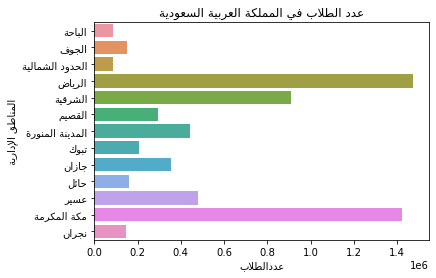

In [50]:
zlbl= get_display( arabic_reshaper.reshape('عدد الطلاب في المملكة العربية السعودية'))
plt.figure(figsize=[6,4])
plt.title(zlbl)
df_tuple =list(zip(mareg_df['المنطقة الإدارية'],mareg_df['عدد الطلاب']))

first_columns= [get_display( arabic_reshaper.reshape(x[0])) for x in df_tuple]
second_columns= [x[1] for x in df_tuple]

xlbl = get_display( arabic_reshaper.reshape('عددالطلاب'))
ylbl = get_display( arabic_reshaper.reshape('المناطق الإدارية'))


sns.barplot(x = second_columns ,y=first_columns,data=mareg_df);
plt.xlabel(xlbl, fontdict=None, labelpad=None)
plt.ylabel(ylbl, fontdict=None, labelpad=None);




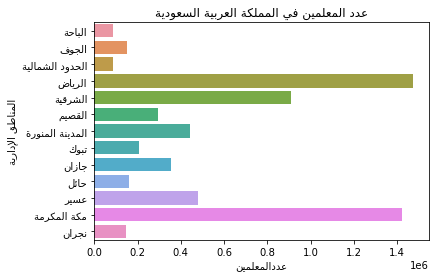

In [51]:
zlbl= get_display( arabic_reshaper.reshape('عدد المعلمين في المملكة العربية السعودية'))
plt.figure(figsize=[6,4])
plt.title(zlbl)
df_tuple1 =list(zip(mareg_df['المنطقة الإدارية'],mareg_df['عدد المعلمين']))

first1_columns= [get_display( arabic_reshaper.reshape(x[0])) for x in df_tuple1]
second1_columns= [x[1] for x in df_tuple]

xlbl = get_display( arabic_reshaper.reshape('عددالمعلمين'))
ylbl = get_display( arabic_reshaper.reshape('المناطق الإدارية'))


sns.barplot(x = second1_columns ,y=first1_columns,data=mareg_df);
plt.xlabel(xlbl, fontdict=None, labelpad=None)
plt.ylabel(ylbl, fontdict=None, labelpad=None);





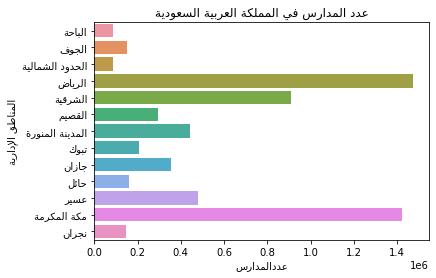

In [52]:
zlbl= get_display( arabic_reshaper.reshape('عدد المدارس في المملكة العربية السعودية'))
plt.figure(figsize=[6,4])
plt.title(zlbl)
df_tuple2 =list(zip(mareg_df['المنطقة الإدارية'],mareg_df['عدد المدارس']))

first2_columns= [get_display( arabic_reshaper.reshape(x[0])) for x in df_tuple2]
second2_columns= [x[1] for x in df_tuple]

xlbl = get_display( arabic_reshaper.reshape('عددالمدارس'))
ylbl = get_display( arabic_reshaper.reshape('المناطق الإدارية'))


sns.barplot(x = second2_columns ,y=first2_columns,data=mareg_df);
plt.xlabel(xlbl, fontdict=None, labelpad=None)
plt.ylabel(ylbl, fontdict=None, labelpad=None);





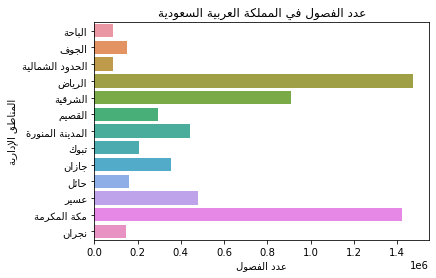

In [53]:
zlbl= get_display( arabic_reshaper.reshape('عدد الفصول في المملكة العربية السعودية'))
plt.figure(figsize=[6,4])
plt.title(zlbl)
df_tuple3 =list(zip(mareg_df['المنطقة الإدارية'],mareg_df['عدد الفصول']))

first3_columns= [get_display( arabic_reshaper.reshape(x[0])) for x in df_tuple3]
second3_columns= [x[1] for x in df_tuple]

xlbl = get_display( arabic_reshaper.reshape('عدد الفصول'))
ylbl = get_display( arabic_reshaper.reshape('المناطق الإدارية'))


sns.barplot(x = second3_columns ,y=first3_columns,data=mareg_df);
plt.xlabel(xlbl, fontdict=None, labelpad=None)
plt.ylabel(ylbl, fontdict=None, labelpad=None);





العامل الثقافي 

In [54]:
xls3 = pd.ExcelFile('العامل الثقافي .xlsx')


In [55]:
df7 = pd.read_excel(xls3, 'sheet1') 
df7

,المناطق الإدارية,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,Unnamed: 6
0,الرياض,40.58,53.21,42.18,88.94,38.47,NaN
1,مكة المكرمة,34.72,54.55,68.41,91.94,37.71,NaN
2,المدينة المنورة,30.39,49.07,64.15,88.86,43.46,NaN
3,القصيم,33.57,45.66,38.12,85.16,28.02,NaN
4,المنطقة الشرقية,37.72,62.40,55.32,95.21,51.02,NaN
5,عسير,37.56,54.52,44.54,96.17,29.55,NaN
6,تبوك,27.50,56.64,48.67,97.37,38.26,NaN
7,حائل,26.76,52.78,49.11,93.64,28.19,NaN
8,الحدود الشمالية,15.30,49.65,36.69,96.49,33.66,NaN
9,جازان,35.16,47.85,44.95,96.91,37.66,NaN


In [56]:
df7.drop('Unnamed: 6', axis=1, inplace=True)
df7

,المناطق الإدارية,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية
0,الرياض,40.58,53.21,42.18,88.94,38.47
1,مكة المكرمة,34.72,54.55,68.41,91.94,37.71
2,المدينة المنورة,30.39,49.07,64.15,88.86,43.46
3,القصيم,33.57,45.66,38.12,85.16,28.02
4,المنطقة الشرقية,37.72,62.40,55.32,95.21,51.02
5,عسير,37.56,54.52,44.54,96.17,29.55
6,تبوك,27.50,56.64,48.67,97.37,38.26
7,حائل,26.76,52.78,49.11,93.64,28.19
8,الحدود الشمالية,15.30,49.65,36.69,96.49,33.66
9,جازان,35.16,47.85,44.95,96.91,37.66


In [57]:
df7.rename(columns={'المناطق الإدارية':
                    'المنطقة الإدارية',
               
                   
                   }, inplace=True)

In [58]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   المنطقة الإدارية               13 non-null     object 
 1   مكتبة منزلية                   13 non-null     float64
 2   قراء صحف ومجلات                13 non-null     float64
 3   قراءة كتب                      13 non-null     float64
 4   مشاهدة التلفاز                 13 non-null     float64
 5   الاستماع إلى المحطات الإذاعية  13 non-null     float64
dtypes: float64(5), object(1)
memory usage: 752.0+ bytes


In [59]:
df7.loc[4,'المنطقة الإدارية'] = 'الشرقية'

In [60]:
df7

,المنطقة الإدارية,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية
0,الرياض,40.58,53.21,42.18,88.94,38.47
1,مكة المكرمة,34.72,54.55,68.41,91.94,37.71
2,المدينة المنورة,30.39,49.07,64.15,88.86,43.46
3,القصيم,33.57,45.66,38.12,85.16,28.02
4,الشرقية,37.72,62.40,55.32,95.21,51.02
5,عسير,37.56,54.52,44.54,96.17,29.55
6,تبوك,27.50,56.64,48.67,97.37,38.26
7,حائل,26.76,52.78,49.11,93.64,28.19
8,الحدود الشمالية,15.30,49.65,36.69,96.49,33.66
9,جازان,35.16,47.85,44.95,96.91,37.66


In [61]:
mareg_df

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين
0,الباحة,"84,464.00",941.00,"5,662.00",11092
1,الجوف,"151,527.00",798.00,"6,968.00",12503
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982
5,القصيم,"292,996.00","2,093.00","15,561.00",29971
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617
7,تبوك,"205,673.00","1,053.00","9,080.00",16048
8,جازان,"354,608.00","2,103.00","15,966.00",26487
9,حائل,"162,609.00","1,225.00","8,715.00",17289


In [62]:
df7

,المنطقة الإدارية,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية
0,الرياض,40.58,53.21,42.18,88.94,38.47
1,مكة المكرمة,34.72,54.55,68.41,91.94,37.71
2,المدينة المنورة,30.39,49.07,64.15,88.86,43.46
3,القصيم,33.57,45.66,38.12,85.16,28.02
4,الشرقية,37.72,62.40,55.32,95.21,51.02
5,عسير,37.56,54.52,44.54,96.17,29.55
6,تبوك,27.50,56.64,48.67,97.37,38.26
7,حائل,26.76,52.78,49.11,93.64,28.19
8,الحدود الشمالية,15.30,49.65,36.69,96.49,33.66
9,جازان,35.16,47.85,44.95,96.91,37.66


In [63]:
mareg_df = pd.merge(mareg_df,df7, on='المنطقة الإدارية')
mareg_df

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19


In [64]:
mareg_df.describe()

,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية
count,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00
mean,"477,951.23","2,473.46","21,907.08","38,537.92",29.81,51.30,47.94,93.18,38.36
std,"484,312.29","2,133.78","21,121.94","36,206.02",8.29,4.93,9.76,3.72,7.08
min,"84,464.00",505.00,"3,978.00","7,156.00",13.77,45.66,36.69,85.16,28.02
25%,"151,527.00",941.00,"6,968.00","12,503.00",26.76,47.85,42.18,91.40,33.66
50%,"292,996.00","2,093.00","15,561.00","26,487.00",30.61,49.65,47.16,94.37,38.26
75%,"480,060.00","3,490.00","25,712.00","46,865.00",35.16,54.52,49.11,96.17,43.76
max,"1,473,236.00","7,246.00","66,100.00","114,635.00",40.58,62.40,68.41,97.37,51.02


In [65]:
mareg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   المنطقة الإدارية               13 non-null     object 
 1   عدد الطلاب                     13 non-null     float64
 2   عدد المدارس                    13 non-null     float64
 3   عدد الفصول                     13 non-null     float64
 4   عدد المعلمين                   13 non-null     int64  
 5   مكتبة منزلية                   13 non-null     float64
 6   قراء صحف ومجلات                13 non-null     float64
 7   قراءة كتب                      13 non-null     float64
 8   مشاهدة التلفاز                 13 non-null     float64
 9   الاستماع إلى المحطات الإذاعية  13 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.1+ KB


اداء الطلاب في اختبار القدرات 

In [66]:
df6 = pd.read_excel('student ـperformance.xlsx')

In [67]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   المنطقة الإدارية  13 non-null     object 
 1   >= 81             13 non-null     float64
 2   71-80             13 non-null     float64
 3   60-70             13 non-null     float64
 4   < 60              13 non-null     float64
dtypes: float64(4), object(1)
memory usage: 648.0+ bytes


In [68]:
df6

,المنطقة الإدارية,>= 81,71-80,60-70,< 60
0,الشرقية,0.21,0.26,0.30,0.23
1,الرياض,0.14,0.25,0.32,0.30
2,مكة المكرمة,0.12,0.25,0.34,0.30
3,الباحة,0.10,0.25,0.36,0.29
4,المدنية المنورة,0.12,0.23,0.32,0.34
5,القصيم,0.10,0.23,0.34,0.33
6,عسير,0.09,0.22,0.34,0.35
7,تبوك,0.06,0.17,0.34,0.44
8,جازان,0.06,0.15,0.32,0.47
9,حائل,0.04,0.14,0.34,0.48


In [69]:
df6['< 60'] = df6['< 60'].astype(float).map("{:.2%}".format)
df6['60-70'] = df6['60-70'].astype(float).map("{:.2%}".format)
df6['71-80'] = df6['71-80'].astype(float).map("{:.2%}".format)
df6['>= 81'] = df6['>= 81'].astype(float).map("{:.2%}".format)
df6

,المنطقة الإدارية,>= 81,71-80,60-70,< 60
0,الشرقية,21.00%,26.00%,30.00%,23.00%
1,الرياض,14.00%,25.00%,32.00%,30.00%
2,مكة المكرمة,12.00%,25.00%,34.00%,30.00%
3,الباحة,10.00%,25.00%,36.00%,29.00%
4,المدنية المنورة,12.00%,23.00%,32.00%,34.00%
5,القصيم,10.00%,23.00%,34.00%,33.00%
6,عسير,9.00%,22.00%,34.00%,35.00%
7,تبوك,6.00%,17.00%,34.00%,44.00%
8,جازان,6.00%,15.00%,32.00%,47.00%
9,حائل,4.00%,14.00%,34.00%,48.00%


In [70]:
#df6.['المنطقة الإدارية']
df6['المنطقة الإدارية']=df6['المنطقة الإدارية'].replace(' ', '')
df6

,المنطقة الإدارية,>= 81,71-80,60-70,< 60
0,الشرقية,21.00%,26.00%,30.00%,23.00%
1,الرياض,14.00%,25.00%,32.00%,30.00%
2,مكة المكرمة,12.00%,25.00%,34.00%,30.00%
3,الباحة,10.00%,25.00%,36.00%,29.00%
4,المدنية المنورة,12.00%,23.00%,32.00%,34.00%
5,القصيم,10.00%,23.00%,34.00%,33.00%
6,عسير,9.00%,22.00%,34.00%,35.00%
7,تبوك,6.00%,17.00%,34.00%,44.00%
8,جازان,6.00%,15.00%,32.00%,47.00%
9,حائل,4.00%,14.00%,34.00%,48.00%


In [71]:
df6.loc[4,'المنطقة الإدارية']='المدينة المنورة'

In [72]:
df6.loc[4,'المنطقة الإدارية']==mareg_df.loc[6,'المنطقة الإدارية']

True

In [73]:
df6.loc[12,'المنطقة الإدارية']='الجوف'

In [74]:
df6.loc[12,'المنطقة الإدارية']==mareg_df.loc[1,'المنطقة الإدارية']

True

In [75]:
mareg_df['المنطقة الإدارية']=mareg_df['المنطقة الإدارية'].replace(' ', '')
mareg_df

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19


In [76]:
mareg_df = pd.merge(mareg_df,df6 ,on='المنطقة الإدارية')
mareg_df

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00%,25.00%,36.00%,29.00%
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00%,10.00%,26.00%,61.00%
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00%,15.00%,30.00%,51.00%
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00%,25.00%,32.00%,30.00%
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00%,26.00%,30.00%,23.00%
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00%,23.00%,34.00%,33.00%
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00%,23.00%,32.00%,34.00%
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00%,17.00%,34.00%,44.00%
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00%,15.00%,32.00%,47.00%
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00%,14.00%,34.00%,48.00%


In [77]:
mareg_df.to_csv('students_performance3.cvs')

In [78]:
mareg_df= pd.read_csv('students_performance3.cvs')

In [79]:
mareg_df

,Unnamed: 0,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60
0,0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00%,25.00%,36.00%,29.00%
1,1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00%,10.00%,26.00%,61.00%
2,2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00%,15.00%,30.00%,51.00%
3,3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00%,25.00%,32.00%,30.00%
4,4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00%,26.00%,30.00%,23.00%
5,5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00%,23.00%,34.00%,33.00%
6,6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00%,23.00%,32.00%,34.00%
7,7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00%,17.00%,34.00%,44.00%
8,8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00%,15.00%,32.00%,47.00%
9,9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00%,14.00%,34.00%,48.00%


In [80]:
mareg_df.drop('Unnamed: 0', axis=1, inplace=True)
mareg_df

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00%,25.00%,36.00%,29.00%
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00%,10.00%,26.00%,61.00%
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00%,15.00%,30.00%,51.00%
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00%,25.00%,32.00%,30.00%
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00%,26.00%,30.00%,23.00%
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00%,23.00%,34.00%,33.00%
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00%,23.00%,32.00%,34.00%
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00%,17.00%,34.00%,44.00%
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00%,15.00%,32.00%,47.00%
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00%,14.00%,34.00%,48.00%


الزيارات الثقافية والترفيهية

In [81]:
df8 = pd.read_excel(xls3, 'sheet2') 
df8

,المناطق المناطق الإدارية,في مقر الإقامة,داخل المملكة,خارج الإقامة
0,الرياض,60.25%,43.28%,14.59%
1,مكة المكرمة,71.98%,73.01%,15.29%
2,المدينة المنورة,44.23%,40.09%,8.80%
3,القصيم,53.99%,48.67%,20.44%
4,المنطقة الشرقية,62.14%,55.31%,31.54%
5,عسير,71.32%,39.34%,3.95%
6,تبوك,72.91%,39.54%,13.15%
7,حائل,64.54%,46.20%,10.06%
8,الحدود الشمالية,65.74%,47.62%,19.59%
9,جازان,70.42%,43.80%,5.80%


In [82]:
df8['في مقر الإقامة']=df8['في مقر الإقامة'].str.replace('%', '')
df8['داخل المملكة']=df8['داخل المملكة'].str.replace('%', '')
df8['خارج الإقامة']=df8['خارج الإقامة'].str.replace('%', '')
df8

,المناطق المناطق الإدارية,في مقر الإقامة,داخل المملكة,خارج الإقامة
0,الرياض,60.25,43.28,14.59
1,مكة المكرمة,71.98,73.01,15.29
2,المدينة المنورة,44.23,40.09,8.80
3,القصيم,53.99,48.67,20.44
4,المنطقة الشرقية,62.14,55.31,31.54
5,عسير,71.32,39.34,3.95
6,تبوك,72.91,39.54,13.15
7,حائل,64.54,46.20,10.06
8,الحدود الشمالية,65.74,47.62,19.59
9,جازان,70.42,43.80,5.80


In [83]:
df8['في مقر الإقامة']= df8['في مقر الإقامة'].astype('float')
df8['داخل المملكة']= df8['داخل المملكة'].astype('float')
df8['خارج الإقامة']= df8['خارج الإقامة'].astype('float')

In [84]:
df8["نسبة متوسط معدل الزيارات"] = df8.mean(axis = 1).round(2).astype(str) + '%'

df8

,المناطق المناطق الإدارية,في مقر الإقامة,داخل المملكة,خارج الإقامة,نسبة متوسط معدل الزيارات
0,الرياض,60.25,43.28,14.59,39.37%
1,مكة المكرمة,71.98,73.01,15.29,53.43%
2,المدينة المنورة,44.23,40.09,8.80,31.04%
3,القصيم,53.99,48.67,20.44,41.03%
4,المنطقة الشرقية,62.14,55.31,31.54,49.66%
5,عسير,71.32,39.34,3.95,38.2%
6,تبوك,72.91,39.54,13.15,41.87%
7,حائل,64.54,46.20,10.06,40.27%
8,الحدود الشمالية,65.74,47.62,19.59,44.32%
9,جازان,70.42,43.80,5.80,40.01%


In [85]:
df8.loc[4,'المناطق المناطق الإدارية']='الشرقية'

In [86]:
df8

,المناطق المناطق الإدارية,في مقر الإقامة,داخل المملكة,خارج الإقامة,نسبة متوسط معدل الزيارات
0,الرياض,60.25,43.28,14.59,39.37%
1,مكة المكرمة,71.98,73.01,15.29,53.43%
2,المدينة المنورة,44.23,40.09,8.80,31.04%
3,القصيم,53.99,48.67,20.44,41.03%
4,الشرقية,62.14,55.31,31.54,49.66%
5,عسير,71.32,39.34,3.95,38.2%
6,تبوك,72.91,39.54,13.15,41.87%
7,حائل,64.54,46.20,10.06,40.27%
8,الحدود الشمالية,65.74,47.62,19.59,44.32%
9,جازان,70.42,43.80,5.80,40.01%


In [87]:
df8.rename(columns={'المناطق المناطق الإدارية':
                    'المنطقة الإدارية'}, inplace=True)

In [88]:
df8.drop('في مقر الإقامة', axis=1, inplace=True)
df8.drop('داخل المملكة', axis=1, inplace=True)
df8.drop('خارج الإقامة', axis=1, inplace=True)
df8

,المنطقة الإدارية,نسبة متوسط معدل الزيارات
0,الرياض,39.37%
1,مكة المكرمة,53.43%
2,المدينة المنورة,31.04%
3,القصيم,41.03%
4,الشرقية,49.66%
5,عسير,38.2%
6,تبوك,41.87%
7,حائل,40.27%
8,الحدود الشمالية,44.32%
9,جازان,40.01%


In [89]:
mareg_df1 = pd.merge(mareg_df,df8 ,on='المنطقة الإدارية')
mareg_df1

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60,نسبة متوسط معدل الزيارات
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00%,25.00%,36.00%,29.00%,35.7%
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00%,10.00%,26.00%,61.00%,32.89%
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00%,15.00%,30.00%,51.00%,44.32%
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00%,25.00%,32.00%,30.00%,39.37%
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00%,26.00%,30.00%,23.00%,49.66%
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00%,23.00%,34.00%,33.00%,41.03%
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00%,23.00%,32.00%,34.00%,31.04%
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00%,17.00%,34.00%,44.00%,41.87%
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00%,15.00%,32.00%,47.00%,40.01%
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00%,14.00%,34.00%,48.00%,40.27%


In [90]:
mareg_df1['نسبة عدد الطلاب إلى عدد المعلمين']=round(mareg_df1['عدد الطلاب'] / mareg_df1['عدد المعلمين'])
mareg_df1

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60,نسبة متوسط معدل الزيارات,نسبة عدد الطلاب إلى عدد المعلمين
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00%,25.00%,36.00%,29.00%,35.7%,8.00
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00%,10.00%,26.00%,61.00%,32.89%,12.00
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00%,15.00%,30.00%,51.00%,44.32%,12.00
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00%,25.00%,32.00%,30.00%,39.37%,13.00
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00%,26.00%,30.00%,23.00%,49.66%,14.00
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00%,23.00%,34.00%,33.00%,41.03%,10.00
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00%,23.00%,32.00%,34.00%,31.04%,12.00
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00%,17.00%,34.00%,44.00%,41.87%,13.00
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00%,15.00%,32.00%,47.00%,40.01%,13.00
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00%,14.00%,34.00%,48.00%,40.27%,9.00


In [91]:
mareg_df1['نسبة عدد الطلاب إلى عدد الفصول']=round(mareg_df1['عدد الطلاب'] / mareg_df1['عدد الفصول'])
mareg_df1

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60,نسبة متوسط معدل الزيارات,نسبة عدد الطلاب إلى عدد المعلمين,نسبة عدد الطلاب إلى عدد الفصول
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00%,25.00%,36.00%,29.00%,35.7%,8.00,15.00
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00%,10.00%,26.00%,61.00%,32.89%,12.00,22.00
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00%,15.00%,30.00%,51.00%,44.32%,12.00,22.00
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00%,25.00%,32.00%,30.00%,39.37%,13.00,22.00
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00%,26.00%,30.00%,23.00%,49.66%,14.00,24.00
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00%,23.00%,34.00%,33.00%,41.03%,10.00,19.00
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00%,23.00%,32.00%,34.00%,31.04%,12.00,22.00
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00%,17.00%,34.00%,44.00%,41.87%,13.00,23.00
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00%,15.00%,32.00%,47.00%,40.01%,13.00,22.00
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00%,14.00%,34.00%,48.00%,40.27%,9.00,19.00


In [92]:
mareg_df1['نسبة عدد الطلاب إلى عدد المدارس']=round(mareg_df1['عدد الطلاب'] / mareg_df1['عدد المدارس'])
mareg_df1

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60,نسبة متوسط معدل الزيارات,نسبة عدد الطلاب إلى عدد المعلمين,نسبة عدد الطلاب إلى عدد الفصول,نسبة عدد الطلاب إلى عدد المدارس
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00%,25.00%,36.00%,29.00%,35.7%,8.00,15.00,90.00
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00%,10.00%,26.00%,61.00%,32.89%,12.00,22.00,190.00
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00%,15.00%,30.00%,51.00%,44.32%,12.00,22.00,175.00
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00%,25.00%,32.00%,30.00%,39.37%,13.00,22.00,203.00
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00%,26.00%,30.00%,23.00%,49.66%,14.00,24.00,259.00
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00%,23.00%,34.00%,33.00%,41.03%,10.00,19.00,140.00
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00%,23.00%,32.00%,34.00%,31.04%,12.00,22.00,192.00
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00%,17.00%,34.00%,44.00%,41.87%,13.00,23.00,195.00
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00%,15.00%,32.00%,47.00%,40.01%,13.00,22.00,169.00
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00%,14.00%,34.00%,48.00%,40.27%,9.00,19.00,133.00


In [93]:
mareg_df1.to_csv('students_performance4.cvs')
mareg_df1= pd.read_csv('students_performance4.cvs')

In [94]:
mareg_df1

,Unnamed: 0,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60,نسبة متوسط معدل الزيارات,نسبة عدد الطلاب إلى عدد المعلمين,نسبة عدد الطلاب إلى عدد الفصول,نسبة عدد الطلاب إلى عدد المدارس
0,0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00%,25.00%,36.00%,29.00%,35.7%,8.00,15.00,90.00
1,1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00%,10.00%,26.00%,61.00%,32.89%,12.00,22.00,190.00
2,2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00%,15.00%,30.00%,51.00%,44.32%,12.00,22.00,175.00
3,3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00%,25.00%,32.00%,30.00%,39.37%,13.00,22.00,203.00
4,4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00%,26.00%,30.00%,23.00%,49.66%,14.00,24.00,259.00
5,5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00%,23.00%,34.00%,33.00%,41.03%,10.00,19.00,140.00
6,6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00%,23.00%,32.00%,34.00%,31.04%,12.00,22.00,192.00
7,7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00%,17.00%,34.00%,44.00%,41.87%,13.00,23.00,195.00
8,8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00%,15.00%,32.00%,47.00%,40.01%,13.00,22.00,169.00
9,9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00%,14.00%,34.00%,48.00%,40.27%,9.00,19.00,133.00


In [95]:
mareg_df1.drop('Unnamed: 0', axis=1, inplace=True)

In [96]:
mareg_df1

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60,نسبة متوسط معدل الزيارات,نسبة عدد الطلاب إلى عدد المعلمين,نسبة عدد الطلاب إلى عدد الفصول,نسبة عدد الطلاب إلى عدد المدارس
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00%,25.00%,36.00%,29.00%,35.7%,8.00,15.00,90.00
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00%,10.00%,26.00%,61.00%,32.89%,12.00,22.00,190.00
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00%,15.00%,30.00%,51.00%,44.32%,12.00,22.00,175.00
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00%,25.00%,32.00%,30.00%,39.37%,13.00,22.00,203.00
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00%,26.00%,30.00%,23.00%,49.66%,14.00,24.00,259.00
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00%,23.00%,34.00%,33.00%,41.03%,10.00,19.00,140.00
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00%,23.00%,32.00%,34.00%,31.04%,12.00,22.00,192.00
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00%,17.00%,34.00%,44.00%,41.87%,13.00,23.00,195.00
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00%,15.00%,32.00%,47.00%,40.01%,13.00,22.00,169.00
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00%,14.00%,34.00%,48.00%,40.27%,9.00,19.00,133.00


In [97]:
mareg_df1['>= 81']=mareg_df1['>= 81'].str.replace('%', '')
mareg_df1['71-80']=mareg_df1['71-80'].str.replace('%', '')
mareg_df1['60-70']=mareg_df1['60-70'].str.replace('%', '')
mareg_df1['< 60']=mareg_df1['< 60'].str.replace('%', '')

In [98]:
mareg_df1['>= 81']=mareg_df1['>= 81'].astype('float')
mareg_df1['71-80']=mareg_df1['71-80'].astype('float')
mareg_df1['60-70']=mareg_df1['60-70'].astype('float')
mareg_df1['< 60']=mareg_df1['< 60'].astype('float')


In [99]:
#mareg_df1['عدد الطلاب >=81']=round((mareg_df1['عدد الطلاب'] * mareg_df1['>= 81'])/100)
#mareg_df1


In [100]:
#mareg_df1.drop('عدد الطلاب >=81', axis=1, inplace=True)

In [101]:
mareg_df1

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60,نسبة متوسط معدل الزيارات,نسبة عدد الطلاب إلى عدد المعلمين,نسبة عدد الطلاب إلى عدد الفصول,نسبة عدد الطلاب إلى عدد المدارس
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00,25.00,36.00,29.00,35.7%,8.00,15.00,90.00
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00,10.00,26.00,61.00,32.89%,12.00,22.00,190.00
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00,15.00,30.00,51.00,44.32%,12.00,22.00,175.00
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00,25.00,32.00,30.00,39.37%,13.00,22.00,203.00
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00,26.00,30.00,23.00,49.66%,14.00,24.00,259.00
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00,23.00,34.00,33.00,41.03%,10.00,19.00,140.00
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00,23.00,32.00,34.00,31.04%,12.00,22.00,192.00
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00,17.00,34.00,44.00,41.87%,13.00,23.00,195.00
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00,15.00,32.00,47.00,40.01%,13.00,22.00,169.00
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00,14.00,34.00,48.00,40.27%,9.00,19.00,133.00


In [102]:
mareg_df1

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60,نسبة متوسط معدل الزيارات,نسبة عدد الطلاب إلى عدد المعلمين,نسبة عدد الطلاب إلى عدد الفصول,نسبة عدد الطلاب إلى عدد المدارس
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00,25.00,36.00,29.00,35.7%,8.00,15.00,90.00
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00,10.00,26.00,61.00,32.89%,12.00,22.00,190.00
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00,15.00,30.00,51.00,44.32%,12.00,22.00,175.00
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00,25.00,32.00,30.00,39.37%,13.00,22.00,203.00
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00,26.00,30.00,23.00,49.66%,14.00,24.00,259.00
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00,23.00,34.00,33.00,41.03%,10.00,19.00,140.00
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00,23.00,32.00,34.00,31.04%,12.00,22.00,192.00
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00,17.00,34.00,44.00,41.87%,13.00,23.00,195.00
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00,15.00,32.00,47.00,40.01%,13.00,22.00,169.00
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00,14.00,34.00,48.00,40.27%,9.00,19.00,133.00


In [103]:
mareg_df1



,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60,نسبة متوسط معدل الزيارات,نسبة عدد الطلاب إلى عدد المعلمين,نسبة عدد الطلاب إلى عدد الفصول,نسبة عدد الطلاب إلى عدد المدارس
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00,25.00,36.00,29.00,35.7%,8.00,15.00,90.00
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00,10.00,26.00,61.00,32.89%,12.00,22.00,190.00
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00,15.00,30.00,51.00,44.32%,12.00,22.00,175.00
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00,25.00,32.00,30.00,39.37%,13.00,22.00,203.00
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00,26.00,30.00,23.00,49.66%,14.00,24.00,259.00
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00,23.00,34.00,33.00,41.03%,10.00,19.00,140.00
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00,23.00,32.00,34.00,31.04%,12.00,22.00,192.00
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00,17.00,34.00,44.00,41.87%,13.00,23.00,195.00
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00,15.00,32.00,47.00,40.01%,13.00,22.00,169.00
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00,14.00,34.00,48.00,40.27%,9.00,19.00,133.00


In [104]:

df9 = pd.read_excel('متوسط الدخل .xlsx')


In [105]:
df9

,المنطقة الإدارية,سعودي,إجمالي الدخل
0,الرياض,16011,12668
1,مكة المكرمة,14648,11584
2,المدينة المنورة,12016,9646
3,القصيم,15332,11023
4,الشرقية,17972,14902
5,عسير,11817,10139
6,تبوك,11024,9305
7,حائل,11571,9701
8,الحدود الشمالية,12051,11072
9,جازان,15199,13278


In [106]:
df9.drop('سعودي', axis=1, inplace=True)
df9

,المنطقة الإدارية,إجمالي الدخل
0,الرياض,12668
1,مكة المكرمة,11584
2,المدينة المنورة,9646
3,القصيم,11023
4,الشرقية,14902
5,عسير,10139
6,تبوك,9305
7,حائل,9701
8,الحدود الشمالية,11072
9,جازان,13278


In [107]:
mareg_df1 = pd.merge(mareg_df1,df9, on='المنطقة الإدارية')
mareg_df1

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60,نسبة متوسط معدل الزيارات,نسبة عدد الطلاب إلى عدد المعلمين,نسبة عدد الطلاب إلى عدد الفصول,نسبة عدد الطلاب إلى عدد المدارس,إجمالي الدخل
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00,25.00,36.00,29.00,35.7%,8.00,15.00,90.00,11810
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00,10.00,26.00,61.00,32.89%,12.00,22.00,190.00,11320
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00,15.00,30.00,51.00,44.32%,12.00,22.00,175.00,11072
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00,25.00,32.00,30.00,39.37%,13.00,22.00,203.00,12668
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00,26.00,30.00,23.00,49.66%,14.00,24.00,259.00,14902
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00,23.00,34.00,33.00,41.03%,10.00,19.00,140.00,11023
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00,23.00,32.00,34.00,31.04%,12.00,22.00,192.00,9646
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00,17.00,34.00,44.00,41.87%,13.00,23.00,195.00,9305
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00,15.00,32.00,47.00,40.01%,13.00,22.00,169.00,13278
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00,14.00,34.00,48.00,40.27%,9.00,19.00,133.00,9701


In [108]:
mareg_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   المنطقة الإدارية                  13 non-null     object 
 1   عدد الطلاب                        13 non-null     float64
 2   عدد المدارس                       13 non-null     float64
 3   عدد الفصول                        13 non-null     float64
 4   عدد المعلمين                      13 non-null     int64  
 5   مكتبة منزلية                      13 non-null     float64
 6   قراء صحف ومجلات                   13 non-null     float64
 7   قراءة كتب                         13 non-null     float64
 8   مشاهدة التلفاز                    13 non-null     float64
 9   الاستماع إلى المحطات الإذاعية     13 non-null     float64
 10  >= 81                             13 non-null     float64
 11  71-80                             13 non-null     float64
 12  60-70     

In [109]:
mareg_df1

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60,نسبة متوسط معدل الزيارات,نسبة عدد الطلاب إلى عدد المعلمين,نسبة عدد الطلاب إلى عدد الفصول,نسبة عدد الطلاب إلى عدد المدارس,إجمالي الدخل
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00,25.00,36.00,29.00,35.7%,8.00,15.00,90.00,11810
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00,10.00,26.00,61.00,32.89%,12.00,22.00,190.00,11320
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00,15.00,30.00,51.00,44.32%,12.00,22.00,175.00,11072
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00,25.00,32.00,30.00,39.37%,13.00,22.00,203.00,12668
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00,26.00,30.00,23.00,49.66%,14.00,24.00,259.00,14902
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00,23.00,34.00,33.00,41.03%,10.00,19.00,140.00,11023
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00,23.00,32.00,34.00,31.04%,12.00,22.00,192.00,9646
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00,17.00,34.00,44.00,41.87%,13.00,23.00,195.00,9305
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00,15.00,32.00,47.00,40.01%,13.00,22.00,169.00,13278
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00,14.00,34.00,48.00,40.27%,9.00,19.00,133.00,9701


In [110]:
mareg_df1.columns

Index(['المنطقة الإدارية', 'عدد الطلاب', 'عدد المدارس', 'عدد الفصول',
       'عدد المعلمين', 'مكتبة منزلية', 'قراء صحف ومجلات', 'قراءة كتب',
       'مشاهدة التلفاز', 'الاستماع إلى المحطات الإذاعية', '>= 81', '71-80',
       '60-70', '< 60', 'نسبة متوسط معدل الزيارات',
       'نسبة عدد الطلاب إلى عدد المعلمين', 'نسبة عدد الطلاب إلى عدد الفصول',
       'نسبة عدد الطلاب إلى عدد المدارس', 'إجمالي الدخل'],
      dtype='object')

In [111]:
mareg_df1

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60,نسبة متوسط معدل الزيارات,نسبة عدد الطلاب إلى عدد المعلمين,نسبة عدد الطلاب إلى عدد الفصول,نسبة عدد الطلاب إلى عدد المدارس,إجمالي الدخل
0,الباحة,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00,25.00,36.00,29.00,35.7%,8.00,15.00,90.00,11810
1,الجوف,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00,10.00,26.00,61.00,32.89%,12.00,22.00,190.00,11320
2,الحدود الشمالية,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00,15.00,30.00,51.00,44.32%,12.00,22.00,175.00,11072
3,الرياض,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00,25.00,32.00,30.00,39.37%,13.00,22.00,203.00,12668
4,الشرقية,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00,26.00,30.00,23.00,49.66%,14.00,24.00,259.00,14902
5,القصيم,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00,23.00,34.00,33.00,41.03%,10.00,19.00,140.00,11023
6,المدينة المنورة,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00,23.00,32.00,34.00,31.04%,12.00,22.00,192.00,9646
7,تبوك,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00,17.00,34.00,44.00,41.87%,13.00,23.00,195.00,9305
8,جازان,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00,15.00,32.00,47.00,40.01%,13.00,22.00,169.00,13278
9,حائل,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00,14.00,34.00,48.00,40.27%,9.00,19.00,133.00,9701


In [112]:
mareg_df1['المنطقة الإدارية'].replace({'الباحة' : 'Al-Baha',
                                                   'الجوف' : 'Al-Jouf',
                                                   'الحدود الشمالية':'Northern Borders',
                                                   'الرياض':'Riyadh',
                                                   'الشرقية':'Eastern',
                                                   'القصيم':'Qassim',
                                                   'المدينة المنورة':'Al-Medina',
                                                   'تبوك':'Tabouk',
                                                   'جازان':'Jazan',
                                                   'حائل':'Hail',
                                                   'عسير':'Aseer',
                                                   'مكة المكرمة':'Makkah',
                                                   'نجران':'Najran',
                                           
                                                  },inplace = True)

In [113]:
mareg_df1

,المنطقة الإدارية,عدد الطلاب,عدد المدارس,عدد الفصول,عدد المعلمين,مكتبة منزلية,قراء صحف ومجلات,قراءة كتب,مشاهدة التلفاز,الاستماع إلى المحطات الإذاعية,>= 81,71-80,60-70,< 60,نسبة متوسط معدل الزيارات,نسبة عدد الطلاب إلى عدد المعلمين,نسبة عدد الطلاب إلى عدد الفصول,نسبة عدد الطلاب إلى عدد المدارس,إجمالي الدخل
0,Al-Baha,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00,25.00,36.00,29.00,35.7%,8.00,15.00,90.00,11810
1,Al-Jouf,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00,10.00,26.00,61.00,32.89%,12.00,22.00,190.00,11320
2,Northern Borders,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00,15.00,30.00,51.00,44.32%,12.00,22.00,175.00,11072
3,Riyadh,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00,25.00,32.00,30.00,39.37%,13.00,22.00,203.00,12668
4,Eastern,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00,26.00,30.00,23.00,49.66%,14.00,24.00,259.00,14902
5,Qassim,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00,23.00,34.00,33.00,41.03%,10.00,19.00,140.00,11023
6,Al-Medina,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00,23.00,32.00,34.00,31.04%,12.00,22.00,192.00,9646
7,Tabouk,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00,17.00,34.00,44.00,41.87%,13.00,23.00,195.00,9305
8,Jazan,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00,15.00,32.00,47.00,40.01%,13.00,22.00,169.00,13278
9,Hail,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00,14.00,34.00,48.00,40.27%,9.00,19.00,133.00,9701


In [114]:
mareg_df1.columns = ['Regions','number_students','number_schools','number_classes','number_teachers','home_library',
                     'Read_newspapers_magazines','Read_books','watch_TV','Listen_radio','Student_performance(>=81)','Student_performance(71-80)',
                     'Student_performance(60-70)','Student_performance(<60)','Avg_cultural_visits','students:teachers','students:classes',
                     'students:schools','Family_income']

In [115]:
mareg_df1

,Regions,number_students,number_schools,number_classes,number_teachers,home_library,Read_newspapers_magazines,Read_books,watch_TV,Listen_radio,Student_performance(>=81),Student_performance(71-80),Student_performance(60-70),Student_performance(<60),Avg_cultural_visits,students:teachers,students:classes,students:schools,Family_income
0,Al-Baha,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00,25.00,36.00,29.00,35.7%,8.00,15.00,90.00,11810
1,Al-Jouf,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00,10.00,26.00,61.00,32.89%,12.00,22.00,190.00,11320
2,Northern Borders,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00,15.00,30.00,51.00,44.32%,12.00,22.00,175.00,11072
3,Riyadh,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00,25.00,32.00,30.00,39.37%,13.00,22.00,203.00,12668
4,Eastern,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00,26.00,30.00,23.00,49.66%,14.00,24.00,259.00,14902
5,Qassim,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00,23.00,34.00,33.00,41.03%,10.00,19.00,140.00,11023
6,Al-Medina,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00,23.00,32.00,34.00,31.04%,12.00,22.00,192.00,9646
7,Tabouk,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00,17.00,34.00,44.00,41.87%,13.00,23.00,195.00,9305
8,Jazan,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00,15.00,32.00,47.00,40.01%,13.00,22.00,169.00,13278
9,Hail,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00,14.00,34.00,48.00,40.27%,9.00,19.00,133.00,9701


In [116]:
mareg_df1.to_csv('students_performance4.cvs')

In [117]:
mareg_df1['Family_income']= mareg_df1['Family_income'].astype('float')

In [118]:
mareg_df1['total_performance']=(mareg_df1['Student_performance(>=81)'] * 90) + (mareg_df1['Student_performance(71-80)'] * 85) +(mareg_df1['Student_performance(60-70)'] * 75) + (mareg_df1['Student_performance(<60)'] * 55)
mareg_df1

,Regions,number_students,number_schools,number_classes,number_teachers,home_library,Read_newspapers_magazines,Read_books,watch_TV,Listen_radio,Student_performance(>=81),Student_performance(71-80),Student_performance(60-70),Student_performance(<60),Avg_cultural_visits,students:teachers,students:classes,students:schools,Family_income,total_performance
0,Al-Baha,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00,25.00,36.00,29.00,35.7%,8.00,15.00,90.00,"11,810.00","7,320.00"
1,Al-Jouf,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00,10.00,26.00,61.00,32.89%,12.00,22.00,190.00,"11,320.00","6,335.00"
2,Northern Borders,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00,15.00,30.00,51.00,44.32%,12.00,22.00,175.00,"11,072.00","6,690.00"
3,Riyadh,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00,25.00,32.00,30.00,39.37%,13.00,22.00,203.00,"12,668.00","7,435.00"
4,Eastern,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00,26.00,30.00,23.00,49.66%,14.00,24.00,259.00,"14,902.00","7,615.00"
5,Qassim,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00,23.00,34.00,33.00,41.03%,10.00,19.00,140.00,"11,023.00","7,220.00"
6,Al-Medina,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00,23.00,32.00,34.00,31.04%,12.00,22.00,192.00,"9,646.00","7,305.00"
7,Tabouk,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00,17.00,34.00,44.00,41.87%,13.00,23.00,195.00,"9,305.00","6,955.00"
8,Jazan,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00,15.00,32.00,47.00,40.01%,13.00,22.00,169.00,"13,278.00","6,800.00"
9,Hail,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00,14.00,34.00,48.00,40.27%,9.00,19.00,133.00,"9,701.00","6,740.00"


In [119]:

mareg_df1['Avg_cultural_visits']=mareg_df1['Avg_cultural_visits'].str.replace('%', '')


In [120]:
mareg_df1['Avg_cultural_visits']= mareg_df1['Avg_cultural_visits'].astype('float')

In [121]:
mareg_df1

,Regions,number_students,number_schools,number_classes,number_teachers,home_library,Read_newspapers_magazines,Read_books,watch_TV,Listen_radio,Student_performance(>=81),Student_performance(71-80),Student_performance(60-70),Student_performance(<60),Avg_cultural_visits,students:teachers,students:classes,students:schools,Family_income,total_performance
0,Al-Baha,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00,25.00,36.00,29.00,35.70,8.00,15.00,90.00,"11,810.00","7,320.00"
1,Al-Jouf,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00,10.00,26.00,61.00,32.89,12.00,22.00,190.00,"11,320.00","6,335.00"
2,Northern Borders,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00,15.00,30.00,51.00,44.32,12.00,22.00,175.00,"11,072.00","6,690.00"
3,Riyadh,"1,473,236.00","7,246.00","66,100.00",114635,40.58,53.21,42.18,88.94,38.47,14.00,25.00,32.00,30.00,39.37,13.00,22.00,203.00,"12,668.00","7,435.00"
4,Eastern,"909,884.00","3,516.00","38,062.00",62982,37.72,62.40,55.32,95.21,51.02,21.00,26.00,30.00,23.00,49.66,14.00,24.00,259.00,"14,902.00","7,615.00"
5,Qassim,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00,23.00,34.00,33.00,41.03,10.00,19.00,140.00,"11,023.00","7,220.00"
6,Al-Medina,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00,23.00,32.00,34.00,31.04,12.00,22.00,192.00,"9,646.00","7,305.00"
7,Tabouk,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00,17.00,34.00,44.00,41.87,13.00,23.00,195.00,"9,305.00","6,955.00"
8,Jazan,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00,15.00,32.00,47.00,40.01,13.00,22.00,169.00,"13,278.00","6,800.00"
9,Hail,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00,14.00,34.00,48.00,40.27,9.00,19.00,133.00,"9,701.00","6,740.00"


In [122]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 33em; }</style>"))

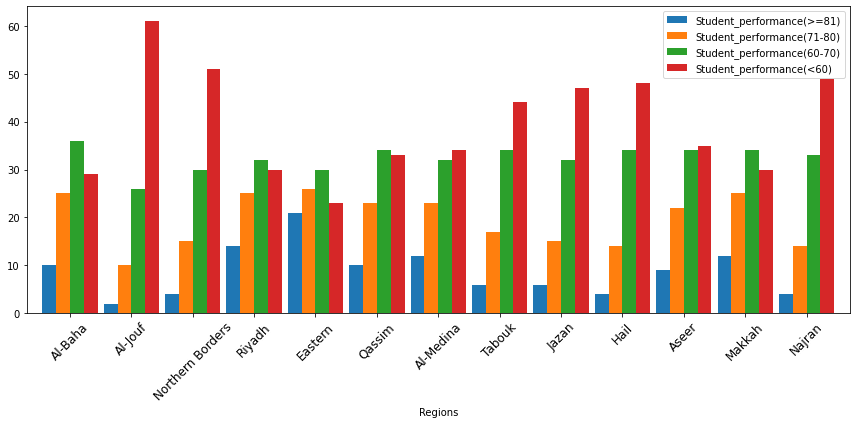

In [123]:
mareg_df1.sort_values(by=['Regions'])
mareg_df1.plot(x="Regions",width = 0.9, y=["Student_performance(>=81)","Student_performance(71-80)",
"Student_performance(60-70)","Student_performance(<60)"], kind="bar",figsize=(12, 6))
plt.xticks(fontsize=12,rotation=45)       
plt.tight_layout()
plt.show()                                                                      

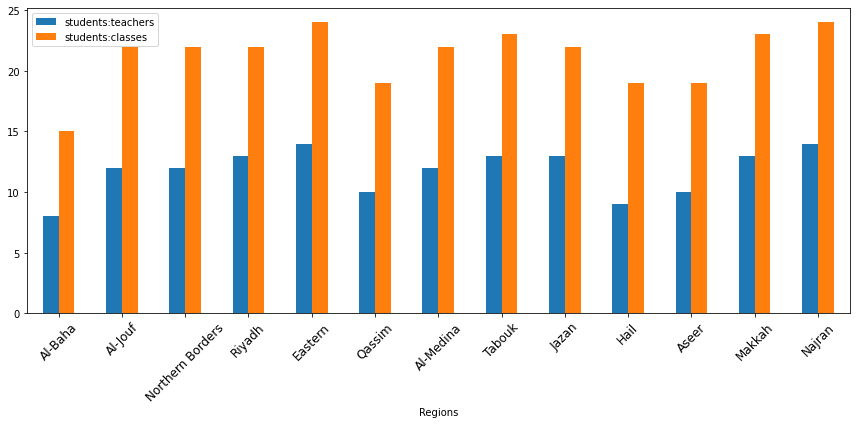

In [124]:
mareg_df1.sort_values(by=['Regions'])
mareg_df1.plot(x="Regions", y=["students:teachers","students:classes"], kind="bar",figsize=(12, 6))
plt.xticks(fontsize=12,rotation=45)
plt.tight_layout()
plt.show()


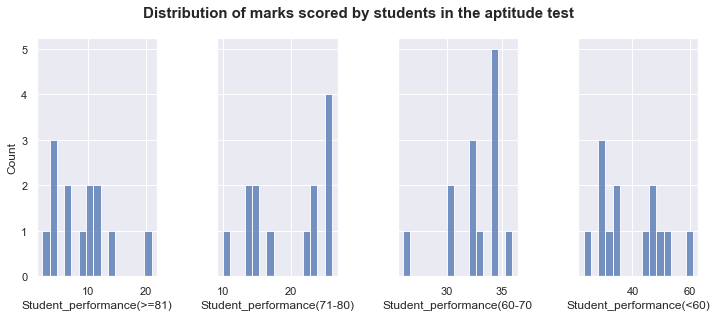

In [125]:
sns.set(style="darkgrid", font_scale=1)
fig, (ax1, ax2, ax3,ax4) = plt.subplots(ncols=4, sharey=True)
fig.set_size_inches(10, 4)

plt.tight_layout()

sns.histplot(mareg_df1["Student_performance(>=81)"],ax=ax1,bins=15)
ax1.set_xlabel('Student_performance(>=81)')

sns.histplot(mareg_df1["Student_performance(71-80)"],ax=ax2,bins=15)
ax2.set_xlabel('Student_performance(71-80)')

sns.histplot(mareg_df1["Student_performance(60-70)"],ax=ax3,bins=15)
ax3.set_xlabel('Student_performance(60-70')

sns.histplot(mareg_df1["Student_performance(<60)"],ax=ax4,bins=15)
ax4.set_xlabel('Student_performance(<60)')
#binwidth=2
#bins

fig.subplots_adjust(wspace = 0.5)
plt.suptitle('Distribution of marks scored by students in the aptitude test',fontweight="bold",fontsize = 15,y=1.05)    
plt.show()

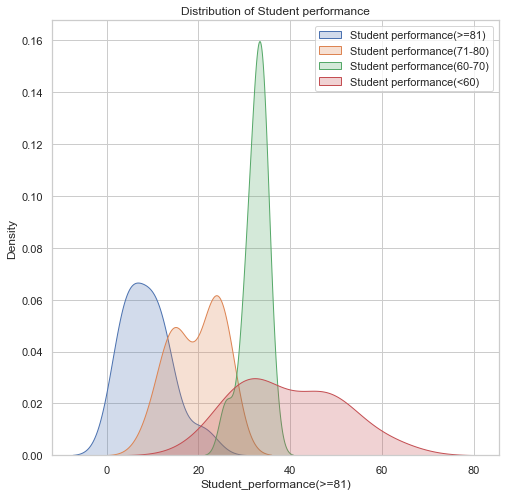

In [149]:
plt.figure(figsize=(8,8))


sns.kdeplot(data=mareg_df1['Student_performance(>=81)'], label='Student performance(>=81)', shade=True)
sns.kdeplot(data=mareg_df1['Student_performance(71-80)'], label='Student performance(71-80)', shade=True)
sns.kdeplot(data=mareg_df1['Student_performance(60-70)'], label="Student performance(60-70)", shade=True)
sns.kdeplot(data=mareg_df1['Student_performance(<60)'], label="Student performance(<60)", shade=True)

plt.title("Distribution of Student performance");
plt.legend(loc = "upper right");

/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda

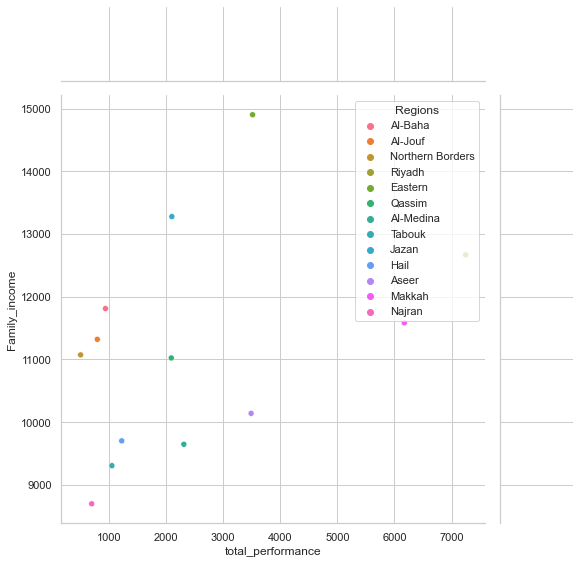

In [173]:
sns.set_theme(style="whitegrid")
#plt.figure(figsize=(25,28))
ax = sns.jointplot(data=mareg_df1, x="total_performance", y="Family_income", hue="Regions", height=8)


/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda

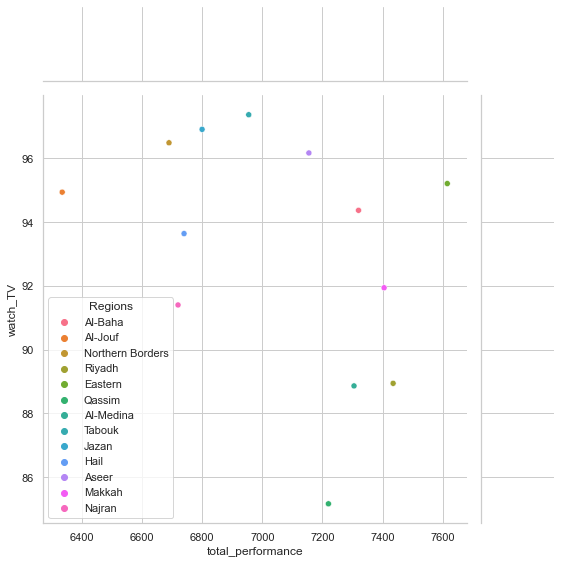

In [128]:
sns.set_theme(style="whitegrid")
#plt.figure(figsize=(25,28))
ax = sns.jointplot(data=mareg_df1, x="total_performance", y="watch_TV", hue="Regions", height=8);

/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda

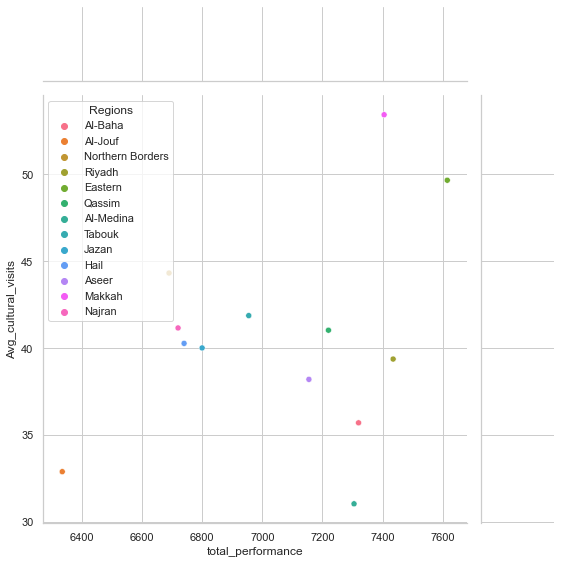

In [129]:
sns.set_theme(style="whitegrid")
#plt.figure(figsize=(25,28))
ax = sns.jointplot(data=mareg_df1, x="total_performance", y="Avg_cultural_visits", hue="Regions", height=8);

/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda

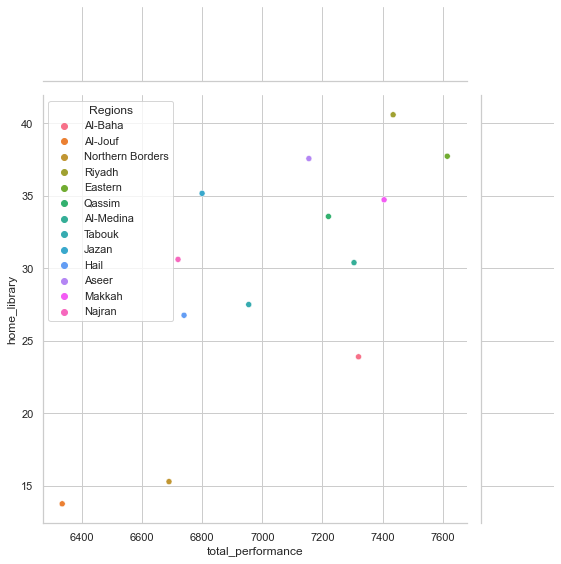

In [130]:
sns.set_theme(style="whitegrid")
#plt.figure(figsize=(25,28))
ax = sns.jointplot(data=mareg_df1, x="total_performance", y="home_library", hue="Regions", height=8);

/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda

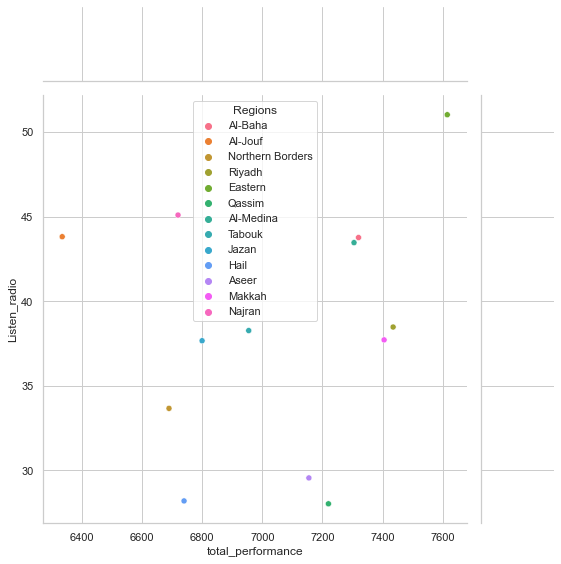

In [131]:
sns.set_theme(style="whitegrid")
#plt.figure(figsize=(25,28))
ax = sns.jointplot(data=mareg_df1, x="total_performance", y="Listen_radio", hue="Regions", height=8);

/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda

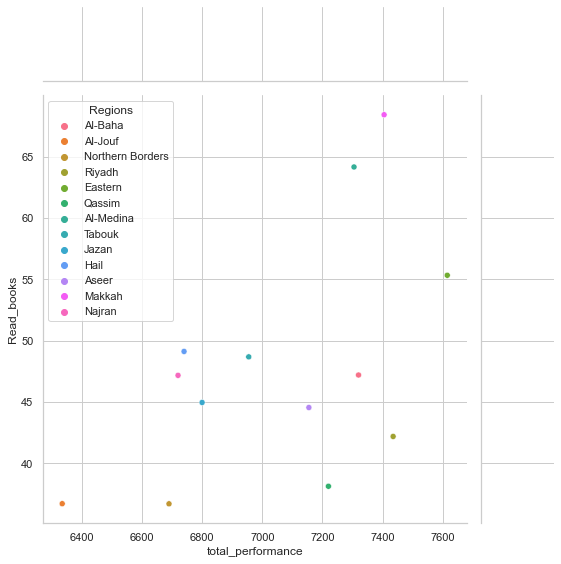

In [132]:
sns.set_theme(style="whitegrid")
#plt.figure(figsize=(25,28))
ax = sns.jointplot(data=mareg_df1, x="total_performance", y="Read_books", hue="Regions", height=8);

/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda

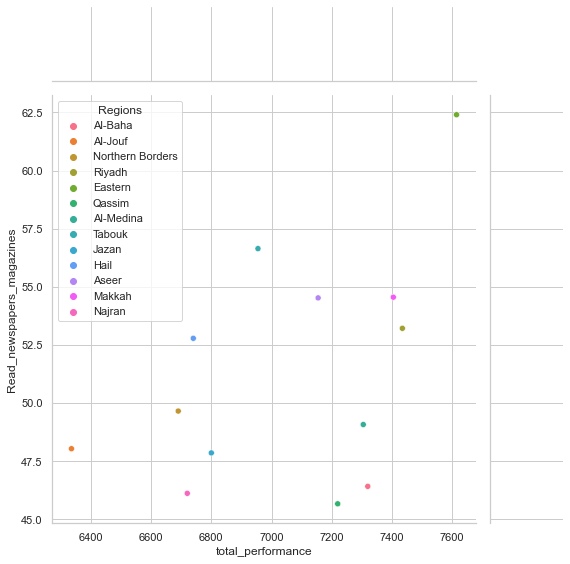

In [133]:
sns.set_theme(style="whitegrid")
#plt.figure(figsize=(25,28))
ax = sns.jointplot(data=mareg_df1, x="total_performance", y="Read_newspapers_magazines", hue="Regions", height=8);

/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda

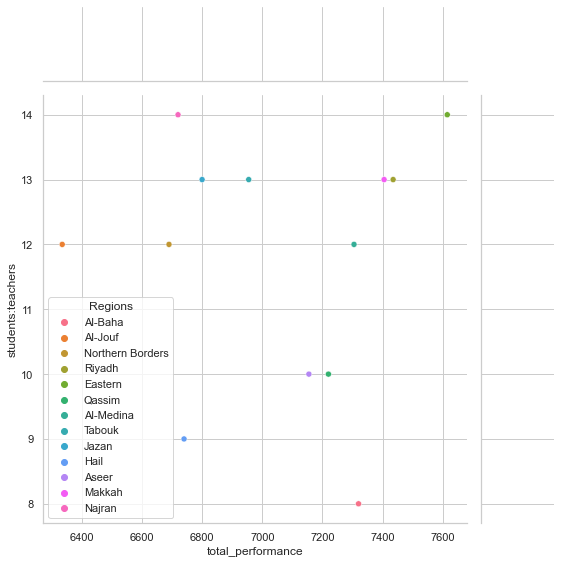

In [134]:
sns.set_theme(style="whitegrid")
#plt.figure(figsize=(25,28))
ax = sns.jointplot(data=mareg_df1, x="total_performance", y="students:teachers", hue="Regions", height=8);

In [135]:
mareg_df1["total_performance"] = pd.to_numeric(mareg_df1["number_schools"], downcast="float")


/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/maithaalqahtani/opt/anaconda

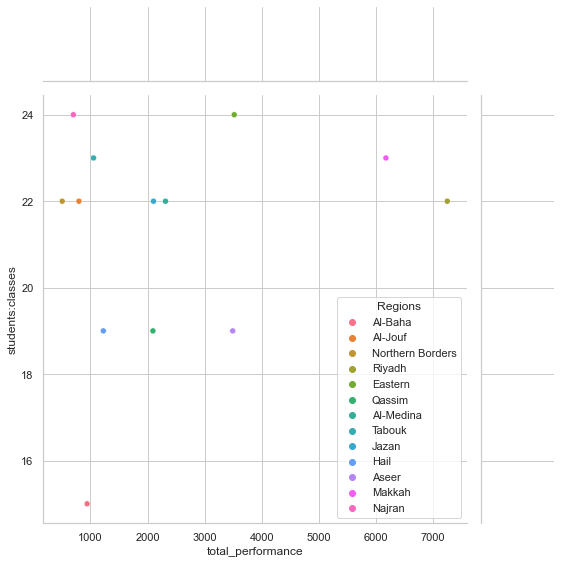

In [136]:
sns.set_theme(style="whitegrid")
#plt.figure(figsize=(25,28))
ax = sns.jointplot(data=mareg_df1, x="total_performance", y="students:classes", hue="Regions", height=8);

In [137]:
mareg_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Regions                     13 non-null     object 
 1   number_students             13 non-null     float64
 2   number_schools              13 non-null     float64
 3   number_classes              13 non-null     float64
 4   number_teachers             13 non-null     int64  
 5   home_library                13 non-null     float64
 6   Read_newspapers_magazines   13 non-null     float64
 7   Read_books                  13 non-null     float64
 8   watch_TV                    13 non-null     float64
 9   Listen_radio                13 non-null     float64
 10  Student_performance(>=81)   13 non-null     float64
 11  Student_performance(71-80)  13 non-null     float64
 12  Student_performance(60-70)  13 non-null     float64
 13  Student_performance(<60)    13 non-nu

In [138]:
x= mareg_df1.sort_values(by=['total_performance'])


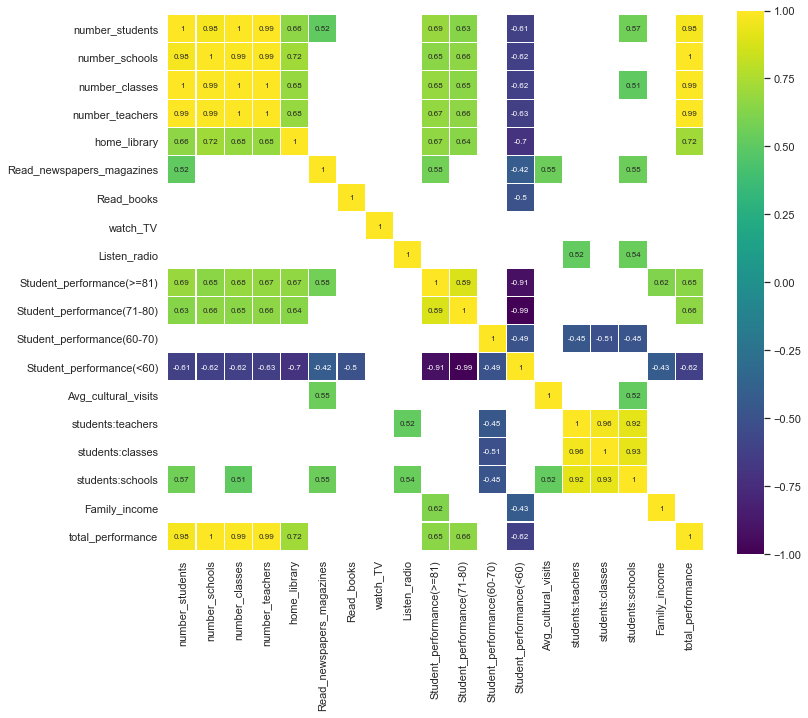

In [139]:
corr = mareg_df1.drop('Regions', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);



In [140]:
mareg_df1.Avg_cultural_visits.unique

<bound method Series.unique of 0    35.70
1    32.89
2    44.32
3    39.37
4    49.66
5    41.03
6    31.04
7    41.87
8    40.01
9    40.27
10   38.20
11   53.43
12   41.16
Name: Avg_cultural_visits, dtype: float64>

In [141]:
mareg_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Regions                     13 non-null     object 
 1   number_students             13 non-null     float64
 2   number_schools              13 non-null     float64
 3   number_classes              13 non-null     float64
 4   number_teachers             13 non-null     int64  
 5   home_library                13 non-null     float64
 6   Read_newspapers_magazines   13 non-null     float64
 7   Read_books                  13 non-null     float64
 8   watch_TV                    13 non-null     float64
 9   Listen_radio                13 non-null     float64
 10  Student_performance(>=81)   13 non-null     float64
 11  Student_performance(71-80)  13 non-null     float64
 12  Student_performance(60-70)  13 non-null     float64
 13  Student_performance(<60)    13 non-nu

In [142]:
x=mareg_df1.sort_values(by=['total_performance'])
x

,Regions,number_students,number_schools,number_classes,number_teachers,home_library,Read_newspapers_magazines,Read_books,watch_TV,Listen_radio,Student_performance(>=81),Student_performance(71-80),Student_performance(60-70),Student_performance(<60),Avg_cultural_visits,students:teachers,students:classes,students:schools,Family_income,total_performance
2,Northern Borders,"88,482.00",505.00,"3,978.00",7156,15.30,49.65,36.69,96.49,33.66,4.00,15.00,30.00,51.00,44.32,12.00,22.00,175.00,"11,072.00",505.00
12,Najran,"145,397.00",700.00,"6,150.00",10039,30.61,46.11,47.16,91.40,45.09,4.00,14.00,33.00,49.00,41.16,14.00,24.00,208.00,"8,697.00",700.00
1,Al-Jouf,"151,527.00",798.00,"6,968.00",12503,13.77,48.03,36.70,94.94,43.81,2.00,10.00,26.00,61.00,32.89,12.00,22.00,190.00,"11,320.00",798.00
0,Al-Baha,"84,464.00",941.00,"5,662.00",11092,23.90,46.41,47.19,94.37,43.76,10.00,25.00,36.00,29.00,35.70,8.00,15.00,90.00,"11,810.00",941.00
7,Tabouk,"205,673.00","1,053.00","9,080.00",16048,27.50,56.64,48.67,97.37,38.26,6.00,17.00,34.00,44.00,41.87,13.00,23.00,195.00,"9,305.00","1,053.00"
9,Hail,"162,609.00","1,225.00","8,715.00",17289,26.76,52.78,49.11,93.64,28.19,4.00,14.00,34.00,48.00,40.27,9.00,19.00,133.00,"9,701.00","1,225.00"
5,Qassim,"292,996.00","2,093.00","15,561.00",29971,33.57,45.66,38.12,85.16,28.02,10.00,23.00,34.00,33.00,41.03,10.00,19.00,140.00,"11,023.00","2,093.00"
8,Jazan,"354,608.00","2,103.00","15,966.00",26487,35.16,47.85,44.95,96.91,37.66,6.00,15.00,32.00,47.00,40.01,13.00,22.00,169.00,"13,278.00","2,103.00"
6,Al-Medina,"443,254.00","2,313.00","20,291.00",37617,30.39,49.07,64.15,88.86,43.46,12.00,23.00,32.00,34.00,31.04,12.00,22.00,192.00,"9,646.00","2,313.00"
10,Aseer,"480,060.00","3,490.00","25,712.00",46865,37.56,54.52,44.54,96.17,29.55,9.00,22.00,34.00,35.00,38.20,10.00,19.00,138.00,"10,139.00","3,490.00"


In [143]:
mareg_df2=mareg_df1.sort_values(by=['total_performance'])


In [144]:
df_num_corr = mareg_df1.corr()['total_performance'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 8 strongly correlated values with SalePrice:
number_schools                1.00
number_teachers               0.99
number_classes                0.99
number_students               0.98
home_library                  0.72
Student_performance(71-80)    0.66
Student_performance(>=81)     0.65
Student_performance(<60)     -0.62
Name: total_performance, dtype: float64


In [145]:
df_num_corr = mareg_df1.corr()['Student_performance(>=81)'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
Student_performance(>=81)     1.00
Student_performance(71-80)    0.89
number_students               0.69
number_classes                0.68
number_teachers               0.67
home_library                  0.67
number_schools                0.65
Family_income                 0.62
Read_newspapers_magazines     0.58
Student_performance(<60)     -0.91
Name: Student_performance(>=81), dtype: float64


In [146]:
df_num_corr = mareg_df1.corr()['Student_performance(71-80)'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 8 strongly correlated values with SalePrice:
Student_performance(71-80)    1.00
Student_performance(>=81)     0.89
number_teachers               0.66
number_schools                0.66
number_classes                0.65
home_library                  0.64
number_students               0.63
Student_performance(<60)     -0.99
Name: Student_performance(71-80), dtype: float64


In [147]:
df_num_corr = mareg_df1.corr()['Student_performance(71-80)'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 8 strongly correlated values with SalePrice:
Student_performance(71-80)    1.00
Student_performance(>=81)     0.89
number_teachers               0.66
number_schools                0.66
number_classes                0.65
home_library                  0.64
number_students               0.63
Student_performance(<60)     -0.99
Name: Student_performance(71-80), dtype: float64


In [148]:
df_num_corr = mareg_df1.corr()['Student_performance(<60)'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 8 strongly correlated values with SalePrice:
Student_performance(<60)      1.00
number_students              -0.61
number_classes               -0.62
number_schools               -0.62
number_teachers              -0.63
home_library                 -0.70
Student_performance(>=81)    -0.91
Student_performance(71-80)   -0.99
Name: Student_performance(<60), dtype: float64
